# Task-2 (ID3 and C4.5)

In [214]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn import tree
import graphviz

In [215]:
diabetes_df = pd.read_csv("diabetes.csv")

In [216]:
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [217]:
diabetes_df.shape

(768, 9)

In [218]:
diabetes_df.isnull().sum() #check for any NaN values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [219]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [220]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [221]:
X = diabetes_df.drop('Outcome',axis=1).values           #create numpy arrays for features and target
y = diabetes_df['Outcome'].values   

# ID3

In [222]:
id3 = sklearn.tree.DecisionTreeClassifier(criterion = "entropy",random_state=42)
id3.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

# Graph

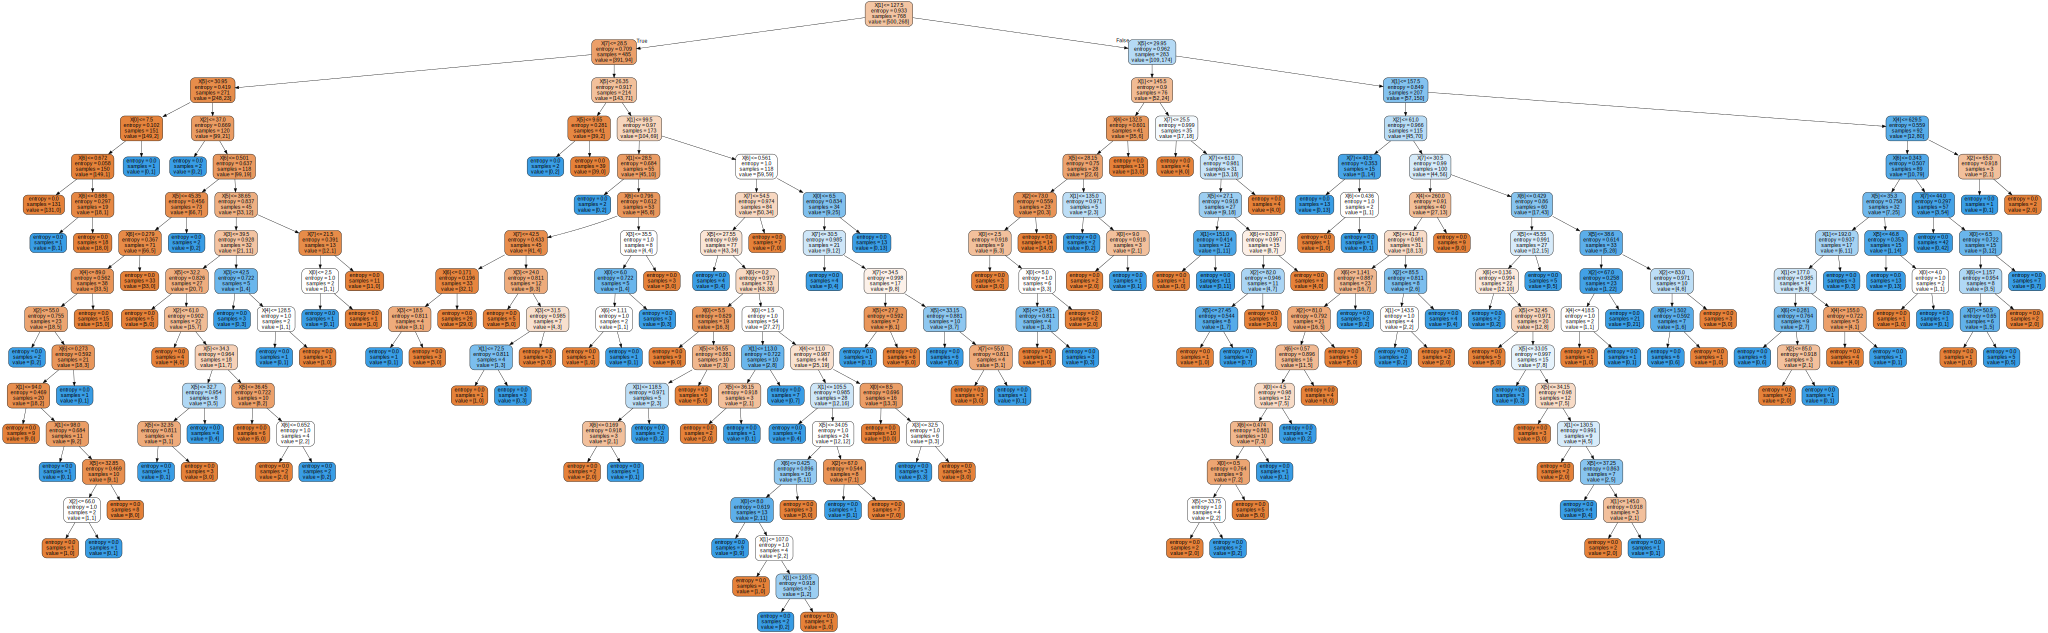

In [223]:
dot_data = tree.export_graphviz(id3, out_file=None, rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph.render("Diabetes")

graph

In [224]:
#import libraries
from sklearn.model_selection import cross_val_score

In [225]:
scores = cross_val_score(id3, X, y, cv=2) # cv = 2 means 2-fold cross validation
print("Cross-validated scores:", scores)
print("Model Accuracy : ", scores.mean())

Cross-validated scores: [0.71354167 0.66145833]
Model Accuracy :  0.6875


# C4.5

In [226]:
from chefboost import Chefboost as chef

In [227]:
df = pd.read_csv("weather_data.csv")

In [228]:
df.head(10)

,Outlook,Temperature,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Cool,Normal,Weak,Yes
4,Rain,Cool,Normal,Strong,No
5,Sunny,Mild,High,Weak,No
6,Sunny,Cool,Normal,Weak,Yes
7,Rain,Mild,Normal,Weak,Yes
8,Sunny,Mild,Normal,Strong,Yes
9,Overcast,Mild,High,Strong,Yes


In [229]:
df.shape

(14, 5)

In [230]:
df.isnull().sum() #check for any NaN values

Outlook        0
Temperature    0
Humidity       0
Wind           0
Decision       0
dtype: int64

In [231]:
config = {'algorithm':'C4.5'}

In [232]:
model = chef.fit(df,config)

C4.5  tree is going to be built...
-------------------------
finished in  1.7030017375946045  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  14  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[5, 0], [0, 9]]
Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [233]:
for index, instance in df.iterrows():
    prediction = chef.predict(model,instance)
    actual = instance['Decision']
    
    print(prediction, "  :  ", actual)

No   :   No
No   :   No
Yes   :   Yes
Yes   :   Yes
No   :   No
No   :   No
Yes   :   Yes
Yes   :   Yes
Yes   :   Yes
Yes   :   Yes
Yes   :   Yes
No   :   No
Yes   :   Yes
Yes   :   Yes


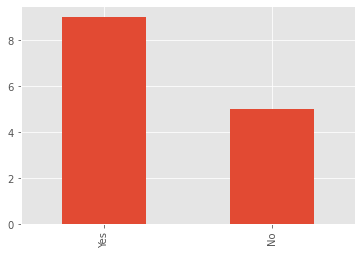

In [234]:
df.Decision.value_counts().plot.bar();